### Synopsis: this is work done on a challenge from DataQuest. The analysis is basis on a survey on Star Wars to answer the question: which Star Wars movie does the public like most?

### The analysis will show that the 5th movie is the most liked of all, both among people who self-identify as Star Wars fans and people who do not. Among people who do not, it is also the movie that's been seen the most.

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64


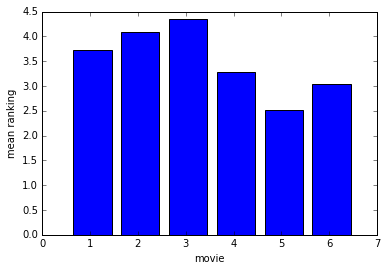

In [21]:
#Import libraries, load data.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

#Remove rows in which "RespondentID" is NaN.
star_wars = star_wars[pd.notnull(star_wars["RespondentID"])]

#Transform column into boolean; I have checked that all values are "Yes" / "No".
star_wars["Have you seen any of the 6 films in the Star Wars franchise?"] = (
    star_wars["Have you seen any of the 6 films in the Star Wars franchise?"] == "Yes"
)


#Transform another column int boolean; this column contains "Yes", "No" and "NaN" values.
def make_boolean(x):
    if x == "Yes":
        return(True)
    elif x == "No":
        return(False)
    else:
        return(np.NaN)

star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] = (
    star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].map(make_boolean)
)

#Transform columns with film names into booleans; these columns contain just the film names and NaNs.
star_wars.iloc[:,3:9] = pd.notnull(star_wars.iloc[:,3:9])

#Rename columns with film names.
star_wars = star_wars.rename(columns={
    "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
    "Unnamed: 4": "seen_2",
    "Unnamed: 5": "seen_3",
    "Unnamed: 6": "seen_4",
    "Unnamed: 7": "seen_5",
    "Unnamed: 8": "seen_6",
})

#Change ranking values to float type.
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

#Rename columns with film names.
star_wars = star_wars.rename(columns={
    "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
    "Unnamed: 10": "ranking_2",
    "Unnamed: 11": "ranking_3",
    "Unnamed: 12": "ranking_4",
    "Unnamed: 13": "ranking_5",
    "Unnamed: 14": "ranking_6",
})

#Calculate the mean ranking by column.
ranking_columns = ["ranking_1", "ranking_2", "ranking_3", "ranking_4", "ranking_5", "ranking_6"]
print(star_wars[ranking_columns].mean())
plt.bar(left=-0.35+np.arange(1,7), height=star_wars[ranking_columns].mean())
plt.xlabel("movie")
plt.ylabel("mean ranking")

### The 5th movie has the lower mean ranking score, which means it's the most appreciated by the audience.

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64


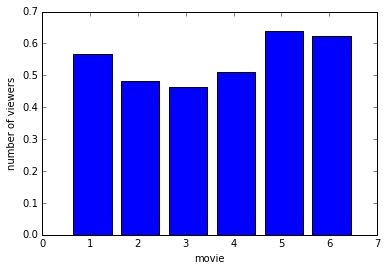

In [22]:
#Calculate the sum of viewers by column.
seen_columns = ["seen_1", "seen_2","seen_3","seen_4","seen_5","seen_6"]
print(star_wars[seen_columns].sum())
plt.bar(left=-0.35+np.arange(1,7), height=star_wars[seen_columns].mean())
plt.xlabel("movie")
plt.ylabel("number of viewers")

### The 5th movie has been seen by the most people. We also note that the 3rd movie, which was the least favourite, has been seen by the fewest people. There seems to be a clear correlation between the number of viewers and the mean rating.

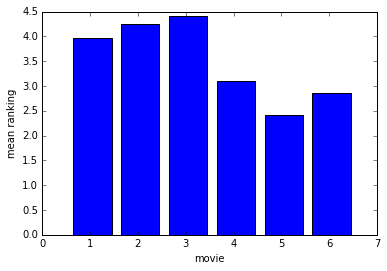

In [33]:
#Distinguish fans and not fans (NOTE: A FEW ROWS ARE IN NEITHER OF THE TWO SUB-DATAFRAMES)
fans = star_wars[star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"] == "Yes"]
not_fans = star_wars[star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"] == "No"]

#Calculate the mean ranking by column among fans.
ranking_columns = ["ranking_1", "ranking_2", "ranking_3", "ranking_4", "ranking_5", "ranking_6"]
plt.bar(left=-0.35+np.arange(1,7), height=fans[ranking_columns].mean())
plt.xlabel("movie")
plt.ylabel("mean ranking")
plt.show()

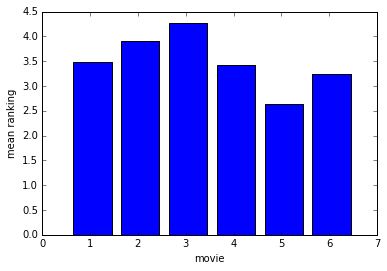

In [34]:
#Calculate the mean ranking by column among not fans.
ranking_columns = ["ranking_1", "ranking_2", "ranking_3", "ranking_4", "ranking_5", "ranking_6"]
plt.bar(left=-0.35+np.arange(1,7), height=not_fans[ranking_columns].mean())
plt.xlabel("movie")
plt.ylabel("mean ranking")
plt.show()

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64


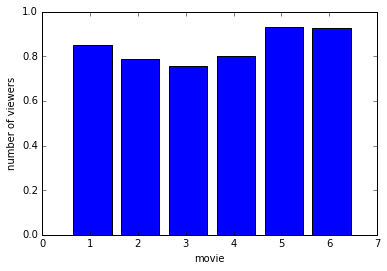

In [35]:
#Calculate the sum of viewers by column among fans.
seen_columns = ["seen_1", "seen_2","seen_3","seen_4","seen_5","seen_6"]
print(star_wars[seen_columns].sum())
plt.bar(left=-0.35+np.arange(1,7), height=fans[seen_columns].mean())
plt.xlabel("movie")
plt.ylabel("number of viewers")

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64


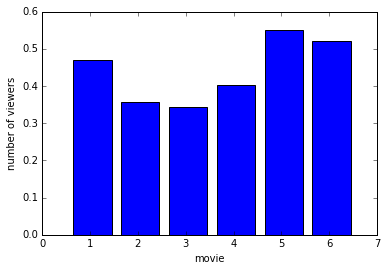

In [36]:
#Calculate the sum of viewers by column among not fans.
seen_columns = ["seen_1", "seen_2","seen_3","seen_4","seen_5","seen_6"]
print(star_wars[seen_columns].sum())
plt.bar(left=-0.35+np.arange(1,7), height=not_fans[seen_columns].mean())
plt.xlabel("movie")
plt.ylabel("number of viewers")

### The 5th movie is the favourite both among fans and non fans. However, fans have seen the other movies almost as much as the 5th (in particular almost all of them have seen the 5th and 6th), while non fans have seen the 5th movie more frequently than the others.